<a href="https://colab.research.google.com/github/fabio-luis/scraps-python/blob/main/scraps_emploi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# La version du langage Python
from platform import python_version
print('La version du langage Python: ', python_version())

La version du langage Python:  3.10.11


In [2]:
# Importation des bibliothèques
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# Le site d’annonce d’emploi
# Le résultat de recherche pour "développeur logiciel" à la ville de Montréal
# avec un salaire supérieur à 100 000 CAD.
URL_linkedin = "https://www.linkedin.com/jobs/search?keywords=D%C3%A9veloppeur%20Logiciel&location=Montreal%2C%20Quebec%2C%20Canad%C3%A1&locationId=&geoId=101330853&f_TPR=&f_SB2=24&position=1&pageNum=0"

# Les classes (html) qui sont utilisées afin de faire le web scraping avec python
class_emploi_entreprise = "base-search-card__info"
class_ville_salaire = "base-search-card__metadata"
class_ville = "job-search-card__location"
class_salaire = "job-search-card__salary-info"

# 10 offres d’emploi
LIMIT = 10

In [4]:
# Il fait la demande de l'URL.
page = requests.get(URL_linkedin)

# En spécifiant un format de "page" souhaité à l'aide de l'analyseur html.
# Cela permet à python de lire les différents composants de la page, 
# plutôt que de la traiter comme une longue chaîne.
soup = BeautifulSoup(page.text, "html.parser")

In [5]:
# Une fonction qui renvoie les données de titre du poste, 
# de l'entreprise, de la ville et du salaire pour chaque poste de travail.
def donnees_emplois(soup): 
  emplois = []
  entrepr = []
  villes = []
  salaire = []

  for emploi in soup.find_all("div", class_ = class_emploi_entreprise, limit=LIMIT):
    for title in emploi.find_all("h3"):      
      title_emploi = title.text.replace('\n','').strip()
      emplois.append(title_emploi)

  for entreprise in soup.find_all("div", class_ = class_emploi_entreprise, limit=LIMIT):
    for name in entreprise.find_all("h4"):      
      name_entrep = name.text.replace('\n','').strip()
      entrepr.append(name_entrep)

  for ville in soup.find_all("div", class_ = class_ville_salaire , limit=LIMIT):
     for city in ville.find_all("span", class_ = class_ville):      
      name_city = city.text.replace('\n','').strip()
      villes.append(name_city)
  
  for salaires in soup.find_all("div", class_ = class_ville_salaire , limit=LIMIT):
     for salary in salaires.find_all("span", class_ = class_salaire):      
      salaire_combien = salary.text.replace('\n','').strip().replace(' ','')
      salaire.append(salaire_combien)
  
         
  return(emplois, entrepr, villes, salaire)  

emploi, entreprise, ville, salaire = donnees_emplois(soup)

In [6]:
# Il fusionne les listes
list_tuples = list(zip(emploi, entreprise, ville, salaire))

In [7]:
# Il crée le dataframe
df = pd.DataFrame(list_tuples, columns=['Emploi', 'Entreprise', 'Ville', 'Salarie'])
df

,Emploi,Entreprise,Ville,Salarie
0,Electronics & Software Developer,Iknal Semikan,"Montreal, Quebec, Canada","SEK500,000.00-SEK960,000.00"
1,Senior Backend Engineer,Prelude,"Montreal, Quebec, Canada","$135,000.00-$175,000.00"
2,Développeur frontal (UI/UX),Robert Half,"Montreal, Quebec, Canada","CA$90,000.00-CA$100,000.00"
3,Automotive Android Developer,Iknal Semikan,"Montreal, Quebec, Canada","SEK500,000.00-SEK960,000.00"
4,Senior Fullstack Engineer,Prelude,"Montreal, Quebec, Canada","$125,000.00-$175,000.00"
5,Adversarial Security Engineer,Prelude,"Montreal, Quebec, Canada","$110,000.00-$185,000.00"
6,Android Developer / Développeur·se Android,Transit,"Montreal, Quebec, Canada","CA$70,000.00-CA$110,000.00"
7,Market Data: C++ Developer,Thurn Partners,"Montreal, Quebec, Canada","CA$80,000.00-CA$150,000.00"
8,MedTech senior software architect - work in Sw...,Iknal Semikan,"Montreal, Quebec, Canada","SEK600,000.00-SEK960,000.00"
9,Application Security Engineer,Hamlyn Williams,"Montreal, Quebec, Canada","$115,000.00-$145,000.00"


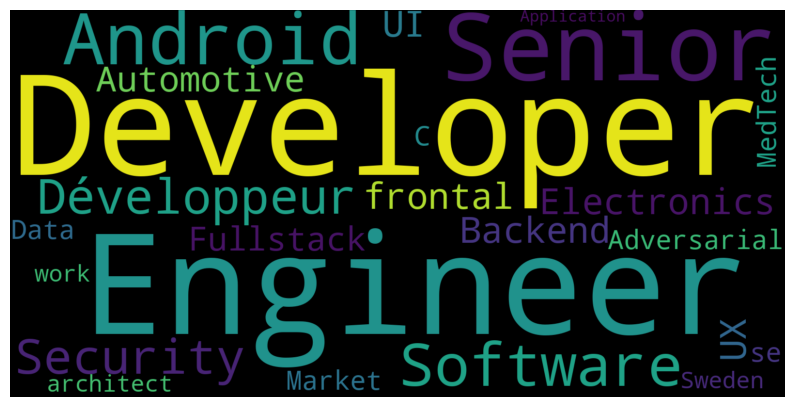

In [8]:
resume = " ".join(s for s in df['Emploi'])

# Le nuage de mot
nuage_mot = WordCloud(background_color="black",
                      width=1600, height=800).generate(resume)

# L'image finale
fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off()
ax.imshow(nuage_mot, interpolation='bilinear')